In [1]:
#from ..usr.lib.craps_utility_script.ipynb import * 
import pandas as pd
import os

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
%matplotlib inline


# Let's Play Craps
This is a notebook to show you different playing strategies when playing craps and your probability in winning

First we will need to simulate throwing the dice:





In [2]:
import random

def throw_dice(n=1):
    throws = []
    while n > 0:
        dieA = random.randint(1,6)
        dieB = random.randint(1,6)
        throws.append(dieA+dieB)
        n-= 1
    return throws
throw_dice()

[3]

Since we are using statistical analysis we will want to store our rolls for data we will be using later in this notebook Now any time we throw we want to be sure to append data_throws

In [3]:
data_throws = []
data_throws.append(throw_dice())
data_throws

[[4]]

Expected value of a dice roll
The expected value of a dice roll is

sum_{i=1}^6 i*1/6 = 3.5
i=1
6,i=1∑i*1/6 = 3.5 

That means that if we toss a dice a large number of times, the mean value should converge to 3.5. Let’s check that empirically by running a simulation 

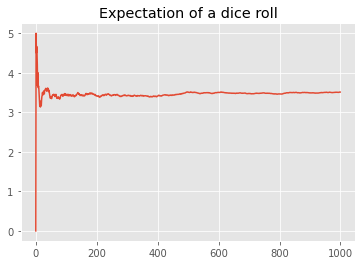

In [4]:
N = 1000
roll = np.zeros(N, dtype=int)
expectation = np.zeros(N)
for i in range(N):
    roll[i] = np.random.randint(1, 7)
for i in range(1, N):
    expectation[i] = np.mean(roll[0:i])
plt.plot(expectation)
plt.title("Expectation of a dice roll")
plt.show()

# Basic Craps Statistics 
There are **36** possibilities when rolling 2 dice; **6 to the power of 2** 
\
Let's evaluate what the likelihood of throwing any number is
### Step I: Get all possible sums

In [5]:
#Step I: Get all possible sums
T = 6**2
dieA = [1,2,3,4,5,6]
dieB = [1,2,3,4,5,6]
sums = {}
for i in range(len(dieA)):
    rolls = []
    for j in range(len(dieB)):
        rolls.append(dieA[i] + dieB[j])
    sums[i] = rolls
die_df = pd.DataFrame(sums)
die_df.index = ['1','2','3','4','5','6']
die_df.columns = ['1','2','3','4','5','6']
die_df

,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


### Step II: Calculate Occurances 

In [6]:
#Step II: Calculate Occurances 
num_count = {}
div ={}
for n in die_df.columns:
    for val in die_df[n]:
        if val in num_count:
            num_count[val] += 1
        else:
            num_count[val] = 1
num_count        

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

### Step III: Organize and Interprete Data

In [7]:
#Step III: Organize and Interprete Data
count_stat = {}
for val in num_count:
    count_stat[val] = (num_count[val]/T )*100
    div[str(val)] = str(num_count[val]) + '/' + str(T)
df =pd.DataFrame(count_stat, index=['%']).transpose()
df['div'] = div.values()
df

,%,div
2,2.777778,1/36
3,5.555556,2/36
4,8.333333,3/36
5,11.111111,4/36
6,13.888889,5/36
7,16.666667,6/36
8,13.888889,5/36
9,11.111111,4/36
10,8.333333,3/36
11,5.555556,2/36


Now, we have a finalized dataframe with every possible throwing combo and the likelihood of throwing it. So, what do we see?
* 7 is the number with the highest probability of being thrown
* 2 & 12 are the least likely
* The closer the number is to 7, the better the chances of rolling that number

#### Now let's simulate throwing the dice 500 times and test our statistics

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

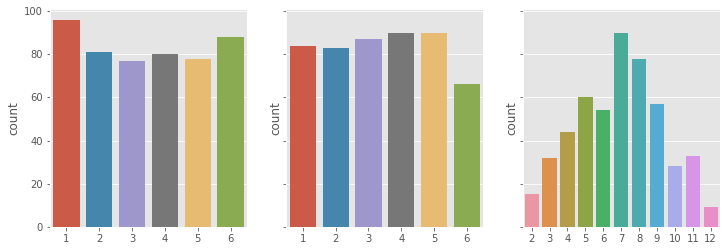

In [8]:
d1 = []
d2 = []
sums = []
n=500
for i in range(n):
    dieA = random.randint(1,6)
    dieB = random.randint(1,6)
    d1.append(dieA)
    d2.append(dieB)
    sums.append(dieA+dieB)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(12,4))
sns.countplot(d1, ax=ax1)
sns.countplot(d2, ax=ax2)
sns.countplot(sums, ax=ax3)

So we see a lot of variability between the individual die at 500 rolls; however, the sums have nearly the expected distribution

#### Let's increase it to 10,000 rolls

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

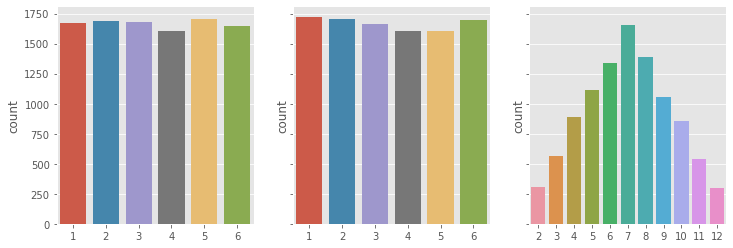

In [9]:
d1 = []
d2 = []
sums = []
n=10000
for i in range(n):
    dieA = random.randint(1,6)
    dieB = random.randint(1,6)
    d1.append(dieA)
    d2.append(dieB)
    sums.append(dieA+dieB)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(12,4))
sns.countplot(d1, ax=ax1)
sns.countplot(d2, ax=ax2)
sns.countplot(sums, ax=ax3)

That's better. So what does this mean?
* Less rolls means that there will be more variance
* As the number of rolls n reaches ∞, the distribution will approach our statistical average


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

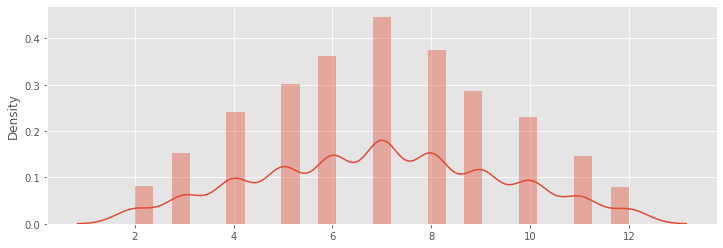

In [10]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True, figsize=(12,4))
sns.distplot(sums, ax=ax1)

Now that we have our expectations in line, let's play a game!

## The Rules of Craps
In craps, the main bet (Pass Line) is on whether the shooter (dice-roller) can throw the "point" number before a 7 is rolled. The shooter starts the game by throwing 2 dice. The sum becomes the "point" number, unless the shooter rolls a 7 or 11 on the come-out roll. Then everyone's bet on the pass line wins even money. If the shooter comes out with a 2, 3, or 12--this is called craps--everyone loses their Pass Line bets.

If the shooter rolls any other number, this number becomes the point.

Every roll after that is a gamble against a seven. Players with money on the Pass Line bet are hoping the shooter will throw that number before they throw a 7.

## The Odds
So how badly are the odds stacked against the shooter? 

In [11]:
df['dec'] = df['%']/100
passline = df.loc[7][2] + df.loc[11][2] 
dark_side = df.loc[2][2] + df.loc[3][2]
chance_of_pt = df.loc[4][2]+df.loc[5][2]+df.loc[6][2]+df.loc[8][2]+df.loc[9][2]+df.loc[10][2]
print('passline win: {}%\ndark side win: {}%\nchance of point: {}%'.format(passline*100, dark_side*100, chance_of_pt*100))

passline win: 22.222222222222218%
dark side win: 8.333333333333332%
chance of point: 66.66666666666666%


#### Winning by Passline

In [12]:
passline_win6 = df.loc[6][2]/(df.loc[7][2]+df.loc[6][2])
passline_win5 = df.loc[5][2]/(df.loc[7][2]+df.loc[5][2])
passline_win4 = df.loc[4][2]/(df.loc[7][2]+df.loc[4][2])
print('Probability of Winning on 6/8: {}%'.format(passline_win6*100),
     '\nProbability of Winning on 5/9: {}%'.format(passline_win5*100),
     '\nProbability of Winning on 4/10: {}%'.format(passline_win4*100))

Probability of Winning on 6/8: 45.45454545454546% 
Probability of Winning on 5/9: 40.0% 
Probability of Winning on 4/10: 33.33333333333333%


#### Probability of Hitting Point or Hitting Passline

come_out = 1-(p(2,3,7,11,12)) 
\
pt6_hit = p(pA/(pA+pB)) = p(6)/(p(6)+p(7))
\
pt5_hit = p(pA/(pA+pB)) = p(5)/(p(5)+p(7))
\
pt4_hit = p(pA/(pA+pB)) = p(4)/(p(4)+p(7))
\
p(hitPoint)+p(comeOutHit)


In [13]:
come_out = 1-(df.loc[2][2]*2+df.loc[3][2]*2+df.loc[7][2])
pt6_hit = df.loc[6][2]/(df.loc[6][2]+df.loc[7][2])
pt5_hit = df.loc[5][2]/(df.loc[5][2]+df.loc[7][2])
pt4_hit = df.loc[4][2]/(df.loc[4][2]+df.loc[7][2])
pt_hit = ((1-pt6_hit)+(1-pt5_hit)+(1-pt4_hit))/3
probability_passline = (come_out*(pt6_hit+pt5_hit+pt4_hit)/3)
strategy_passline= probability_passline+passline
print('Probability Passline Win: {}%'.format(strategy_passline))

Probability Passline Win: 0.4861952861952862%


Once The point is established your chances of winning increases on the dark side

We can compute. We get A before B if we get A, or CA, or CCA, or CCCA and so on.

The probability of A is p. The probability of CA is rp. The probability of CCA is r2p, and so on. So the required probability is
p(1+r+r2+r3+⋯).
If r≠1, then by the usual formula for the sum of an infinite geometric series, our probability is p1−r, which is p/(p+q) or A/(A+B).

In [14]:
dark_side_on_win6 = df.loc[7][2]/(df.loc[7][2]+df.loc[6][2])
dark_side_on_win5 = df.loc[7][2]/(df.loc[7][2]+df.loc[5][2])
dark_side_on_win4 = df.loc[7][2]/(df.loc[7][2]+df.loc[4][2])
print('Probability of Winning on 6/8: {}%'.format(dark_side_on_win6*100),
     '\nProbability of Winning on 5/9: {}%'.format(dark_side_on_win5*100),
     '\nProbability of Winning on 4/10: {}%'.format(dark_side_on_win4*100))

Probability of Winning on 6/8: 54.54545454545454% 
Probability of Winning on 5/9: 60.0% 
Probability of Winning on 4/10: 66.66666666666666%


If we knew we could land a point, our probability of winning would be as follows

In [15]:
_dark_side_on_win6 = dark_side+dark_side_on_win6
_dark_side_on_win5 = dark_side+dark_side_on_win5 
_dark_side_on_win4 = dark_side+dark_side_on_win4
print('Probability of Winning given 6/8: {}%'.format(_dark_side_on_win6*100),
     '\nProbability of Winning given 5/9: {}%'.format(_dark_side_on_win5*100),
     '\nProbability of Winning given 4/10: {}%'.format(_dark_side_on_win4*100))

Probability of Winning given 6/8: 62.878787878787875% 
Probability of Winning given 5/9: 68.33333333333333% 
Probability of Winning given 4/10: 75.0%


#### Probability of getting a Point and 7 Outing after:
come_out = 1-(p(2,3,7,11,12)) 
\
pt6_out = p(pA/(pA+pB)) = p(7)/(p(6)+p(7))
\
pt5_out = p(pA/(pA+pB)) = p(7)/(p(5)+p(7))
\
pt4_out = p(pA/(pA+pB)) = p(7)/(p(4)+p(7))
\
p(hitPoint)+p(comeOutHit)

In [16]:
come_out = 1-(df.loc[2][2]*2+df.loc[3][2]*2+df.loc[7][2])
pt6_out = df.loc[7][2]/(df.loc[6][2]+df.loc[7][2])
pt5_out = df.loc[7][2]/(df.loc[5][2]+df.loc[7][2])
pt4_out = df.loc[7][2]/(df.loc[4][2]+df.loc[7][2])
pt_hit = ((1-pt6_out)+(1-pt5_out)+(1-pt4_out))/3
probability_darkside = (come_out*(pt6_out+pt5_out+pt4_out)/3)
strategy_darkside = probability_darkside+dark_side
print('Probaility Darkside Win: {}%'.format(strategy_darkside))

Probaility Darkside Win: 0.48602693602693603%


In [17]:
print(strategy_passline*100, strategy_darkside*100)

48.619528619528616 48.602693602693606


#### So, what?
* Only playing the passline or don't passline will win 48.6% of the time
* We are expected to loose ~52% of the time 
* If a point can be established on the don't passline the odds of winning significantly increase
* We need to increase our winning percentage by 2% to have a statistical advantage over the house 
* We can reject the null hypothesis that net profit should be 

# Questions: 

Now we aim to answer some questions:
* How many rolls should each player last?
    * Should I get out after n rolls?
    * Should I get out after n rolls without point?
    * Should I get out after n rolls with point?
    * Should I get out after n points?
* **How Does The 11 Factor In**
* Can dice control play a factor? (And can we analytically account for setting the dice + dice control)?
* Are there patterns we can identify that may overlook the laws of statistics indicating what number will be next?
* Should I play numbers?
* Does getting out at a certain number of rolls increase my percent gain? 



#### Let's first tackle the question of rolls

https://www.casinocitytimes.com/donald-catlin/article/how-long-is-a-craps-roll-1240

We need to figure out AandB **p(AnB)=p(A)*p(B)** where;
\
A is the expected n roles per pass line decision (i.e. establish a point) 
\
B is the expected n  roles of pass line decision and 7out (i.e. point was not hit)

Because of the independence of the trials, when I face this second trial the number of trials until failure I expect from this point is the same as the number I faced at the first trial
\
If success is hitting any number but n
\
Failure on first trial occures with frequency q
\
Success on first trial occures with frequency p 
\
epoch e
\
e = q + p(1 + e); Recalling that p = 1 - q
\
e = q + (1 - q)(1 + e); multiplying out we get
\
e = q + 1 - q + e - qe; -e
\
**e = 1/q**

In [18]:
expectedRolls = {}
i = []
pt = [0,4,5,6,8,9,10]
expectedRolls['pt'] = pt
prob = [df.loc[2][2]*2+df.loc[3][2]*2+df.loc[7][2],df.loc[4][2], df.loc[5][2], df.loc[6][2],df.loc[8][2],df.loc[9][2],df.loc[10][2]]
expected_rolls = [1, (1 + 36/9), (1 + 36/10), (1 + 36/11), (1 + 36/11), (1 + 36/10), (1 + 36/9)]
expectedRolls['prob'] = prob
expectedRolls['estRoll'] = expected_rolls
for item_num in range(len(expected_rolls)):
    i.append(expected_rolls[item_num]*prob[item_num])
expectedRolls['prod'] = i
rolls_df = pd.DataFrame()
rolls_df.index = pt
rolls_df['prob'] = expectedRolls['prob']
rolls_df['exRoll'] = expectedRolls['estRoll']
rolls_df['prod'] = expectedRolls['prod']
rolls_df['sum'] = rolls_df['prod'].cumsum()
x_pt= rolls_df.iloc[-1,3]
print(rolls_df, "\nExpected n rolls is {}".format(x_pt))

        prob    exRoll      prod       sum
0   0.333333  1.000000  0.333333  0.333333
4   0.083333  5.000000  0.416667  0.750000
5   0.111111  4.600000  0.511111  1.261111
6   0.138889  4.272727  0.593434  1.854545
8   0.138889  4.272727  0.593434  2.447980
9   0.111111  4.600000  0.511111  2.959091
10  0.083333  5.000000  0.416667  3.375758 
Expected n rolls is 3.3757575757575755


Since 1 = 165/165, the total is (165 + 392)/165 or 557/165
\
**A ~ 3.376 Rolls**
\
Next we want to determine the number of Pass Line decisions per seven out

A Point made is a success; a seven out is a failure. So we need to calculate q, the probability that a seven out occurs given that a Pass Line decision is reached.

All you have to do is add up all of the probabilities for a seven out on each of the six possible points. 

p(p[7]/(p[7]+p[h])+p[7]/(p[7]+p[4]))+p(p[7]/(p[7]+p[5]))+p(p[7]/(p[7]+p[6]))+p(p[7]/(p[7]+p[8]))+p(p[7]/(p[7]+p[9]))+p(p[7]/(p[7]+p[10]))

The result is 784/1980 or 196/495. It follows that the expected number of Pass Line decisions per seven out is 495/196 or approximately **B~2.5255**.


In [19]:
ph_ = df.loc[2][2] + df.loc[3][2] + df.loc[11][2] + df.loc[12][2] 
p7_ = df.loc[3][2]
p4_ = df.loc[4][2]
p5_ = df.loc[5][2]
p6_ = df.loc[6][2]
p8_ = df.loc[8][2]
p9_ = df.loc[9][2]
p10_ = df.loc[10][2]
pm= ((p7_ /(p7_ + p4_))+(p7_ /(p7_ + p5_))+(p7_ /(p7_ + p6_))+(p7_/(p7_+p8_))+(p7_/(p7_+p9_))+(p7_/(p7_+p10_)))
print('Expected n rolls is: {}'.format(pm))

Expected n rolls is: 2.038095238095238


We lost some accuracy **~.0025%** when transitioning from decimals to fractions and back

In [20]:
x_pl = 495/196 
print("Expected n rolls is {}".format(x_pl))

Expected n rolls is 2.5255102040816326


enr = 557/165 rolls/Pass Line decision x 495/196 Pass Line decisions/seven 0ut
\
or enr = 1671/196 rolls/seven out
\
The number is ~8.5255

In [21]:
enr= x_pl * x_pt
print("Total expected rolls are: {}".format(enr))

Total expected rolls are: 8.525510204081632


# Craps Simulation

Next we need to simulate the board

In order to save time I found a suffient board already coded on github
https://github.com/mhegarty/craps/blob/master/craps/models.py

Since this notebook focuses on strategy and stratistics I am going to follow his notebook to simulate gameplay

In [22]:
!pip install craps --upgrade
from craps import Game, PassBet, LineOddsBet, ComeBet, PointOddsBet

#### Play a short game

In [23]:
# Start a game with arrival cash $100 and table minimum bet of $10
g = Game(bankroll=100, minimum_bet=10)

# Make a pass bet for $10
g.bet(PassBet(10))

# Roll the dice
g.roll()

[Table] Welcome to the table shooter!
[Bet] You made a PassBet on the box for 10
[Rail] You have 90.0 on the rail
[Table] The shooter is ready, the point is off
[Table] PassBet for 10 is working on the box
[Roll] Shooter rolled 8
[Roll] The point is 8
[Rail] You have 90.0 on the rail


In [24]:
# The puck is on, put a $20 odds bet on the pass line bet.
g.bet(LineOddsBet(20))

# Place a come bet as well.
g.bet(ComeBet(10)) 

[Bet] You made a LineOddsBet on 8 for 20
[Rail] You have 70.0 on the rail
[Bet] You made a ComeBet on the box for 10
[Rail] You have 60.0 on the rail


In [25]:
# Our bets are placed. Roll!
g.roll()

[Table] The shooter is ready, the point is 8
[Table] PassBet for 10 is working on 8
[Table] LineOddsBet for 20 is working on 8
[Table] ComeBet for 10 is working on the box
[Roll] Shooter rolled 8
[Roll] Winner!!, 8
[Payout] PassBet on 8 paid out 20
[Payout] LineOddsBet on 8 paid out 44.0
[Bet] ComeBet for 10 was moved to the 8
[Rail] You have 124.0 on the rail


In [26]:
# Check your bets
g.callout()

[Table] ComeBet for 10 is working on 8


# 3. Working with betting algorithms
## Example: Three Point Molly
### The Three Point Molly strategy is a neat way to play craps. Some people have suggested that playing this strategy gives the house its lowest edge of any game in the casino. The strategy consists of playing the line and making successive come bets until you have three points "covered".

The algorithm in psudo code should do the following, where points_covered is the count of numbers for which you have bets placed.

1. If it is a come out roll, then make a PassBet and roll
2. Else, for any other roll.
* If you don't already have odds on your pass bet, then add them with a LineOddsBet
* If you have a come bet that has been moved to a point but does not yet have odds, then add odds by making a PointOddsBet on that point.
* If you have less than three points_covered, then make a ComeBet
* Finally, roll

## Setting up parameters for a simulation

In [27]:
# Setting up parameters for a simulation.
arrival_cash   = 1000 # How much are you bringing to the table?
rolls          = 100  # How many rolls to play?
bet_unit       = 10   # How much to bet on line bets and come bets?
x_odds         = 2    # How much odds to bet (typical casino limit is 10x)

### Attributes of the Game class.
The Game and Bet class docstrings describe a number of attributes that are helpful for building a betting algo.

We'll use Game.puck, Game.unsettled_bets, and the Bet.point attributes when building the three point molly.

In [28]:
Game?

### Translating psudo code to python

In [29]:
# Building the algo for the Three Point Molly strategy
# Following the psudo code as a guide, we write the logic to step through before each roll. 
def betting_algo(g):
    
    # If it is a come out roll, then make a PassBet
    # ie. If the puck is off and I have no line bet placed, make a pass bet
    passbets = [bet for bet in g.unsettled_bets if (type(bet) is PassBet)]
    if (not g.puck) and (len(passbets)==0):
        g.bet(PassBet(bet_unit))

    # If you don't already have odds on your pass bet, then add them with a LineOddsBet
    # ie. If the puck is on but no odds on the line, make an odds bet
    lineoddsbets = [bet for bet in g.unsettled_bets if (type(bet) is LineOddsBet)]
    if (g.puck) and (len(lineoddsbets)==0):
            g.bet(LineOddsBet(bet_unit*x_odds))  # bet the line odds

    # If you have a come bet that has been moved to a point but does not yet have odds, 
    #    then add odds by making a PointOddsBet on that point.    
    # ie. If the puck is on and I have a come bet on point but no odds, bet the odds
    if g.puck:
        set_come_bets = [bet for bet in g.unsettled_bets if (type(bet) is ComeBet) and (bet.point)]
        for comeBet in set_come_bets:
            odds = [bet for bet in g.unsettled_bets if (type(bet) is PointOddsBet) and (bet.point == comeBet.point)]
            if not any(odds):
                g.bet(PointOddsBet(bet_unit*x_odds, comeBet.point))

    # If you have less than three `points_covered`, then make a `ComeBet`
    # ie. If the point is set, and no comebet, and I have less than 3 points, place a come bet
    if g.puck:
        set_comebets   = [bet for bet in g.unsettled_bets if (type(bet) is ComeBet) and (bet.point)]
        unset_comebet  = [bet for bet in g.unsettled_bets if (type(bet) is ComeBet) and (not bet.point)]
        if (g.puck) and (not any(unset_comebet)) and (len(set_comebets) < 2):
            g.bet(ComeBet(bet_unit))

### Initialize a Game and run the betting algo for a sequence of rolls.

In [30]:
# Now build a game simulation function that uses the above betting algo. 
def simulate_game(rolls=rolls, loglevel=50):
    """Simulates a game of craps. Optionally pass a loglevel to control stream"""
    g = Game(loglevel=loglevel)
    # Make rolls
    for n in range(rolls):  # Using the number of rolls defined in the game parameters earlier.
        betting_algo(g)
        g.roll()
    # Return the comleted game history
    return g.history

### Playing a 100 roll game and analyzing the results


In [31]:
# Let's play
game_history = simulate_game()

In [32]:
# Read into a dataframe
df = pd.DataFrame(game_history)
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
roll_result,4.0,7.0,11.0,5.0,10.0,11.0,6.0,7.0,7.0,8.0,...,8.0,10.0,4.0,12.0,6.0,7.0,3.0,4.0,5.0,10.0
net_worth,1000.0,980.0,990.0,990.0,990.0,1000.0,1000.0,910.0,920.0,920.0,...,866.0,876.0,926.0,916.0,916.0,866.0,856.0,856.0,856.0,856.0


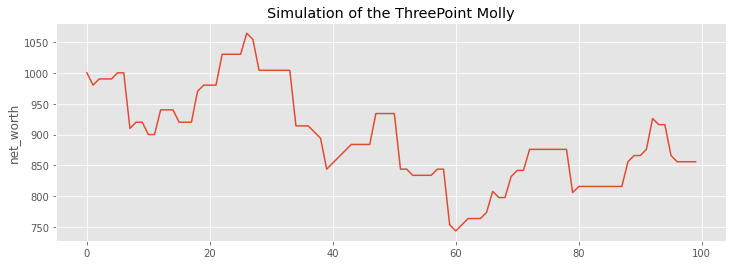

In [33]:
fig, ax1 = plt.subplots(ncols=1, sharey=True, figsize=(12,4))
_ = sns.lineplot(x=df.index, y='net_worth', data=df, ax=ax1).set(title='Simulation of the ThreePoint Molly')

## 4. Parallel Procesing with joblib

Joblib is a fantastic library for parallel processing embarrassingly parallel workloads, which will work great for a monte carlo simulation.

In [34]:
# Install joblib
#!pip install joblib
import joblib

In [35]:
# Simulate 16 games, running 4 games at a time in parallel
games = joblib.Parallel(n_jobs=4)(joblib.delayed(simulate_game)(**{'loglevel':40}) for i in range(16))

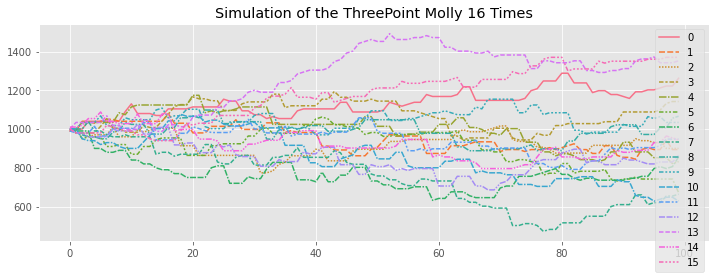

In [36]:
# Gather the results and plot the simulations. 
data = [pd.DataFrame(gh)['net_worth'] for gh in games]
df   = pd.concat(data, axis=1)
df.columns = [str(i) for i in range(len(df.columns))] # Change the column names
df
# Plot, make it pretty
fig, ax1 = plt.subplots(ncols=1, sharey=True, figsize=(12,4))
_ = sns.lineplot(data=df,
                 ax=ax1).set(title='Simulation of the ThreePoint Molly 16 Times')




In [37]:
df_ret = pd.DataFrame(df)